# Exercise 4.9 Task Part 2

## 1. Import libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 2. Set path

In [2]:
# Set system path
path = r'C:\Users\Stony\OneDrive\CareerFoundry\Data Immersion Course\Instacart Basket Analysis'

## 3. Import data

In [4]:
# Import orders_products_customers_combined data into a dataframe
ords_prods_cust_combined =pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_combined.pkl'))

In [7]:
crosstab = pd.crosstab(ords_prods_cust_combined['days_since_last_order'], ords_prods_cust_combined['order_number'], dropna = False)

In [8]:
crosstab.to_clipboard()

## 4. Create a histogram of order_hour_of_day column

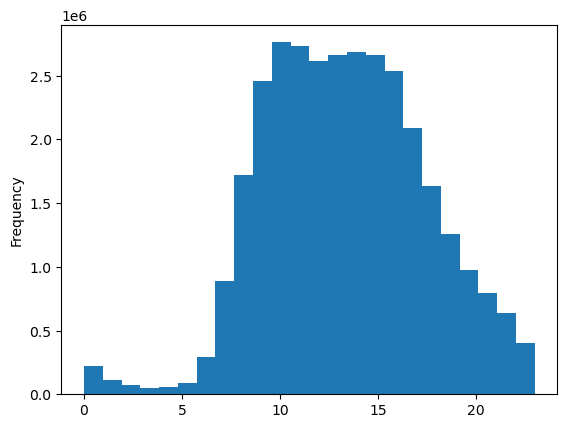

In [9]:
hist = ords_prods_cust_combined['order_hour_of_day'].plot.hist(bins = 24)

In creating my histogram, I used 24 bins since there are 24 hours in the day. This allows us to see there are very few orders in the early morning and late at night with the majority of the orders coming in the middle of the day from 10 AM to 5 PM.

## 5. Create a bar chart from the loyalty_flag column

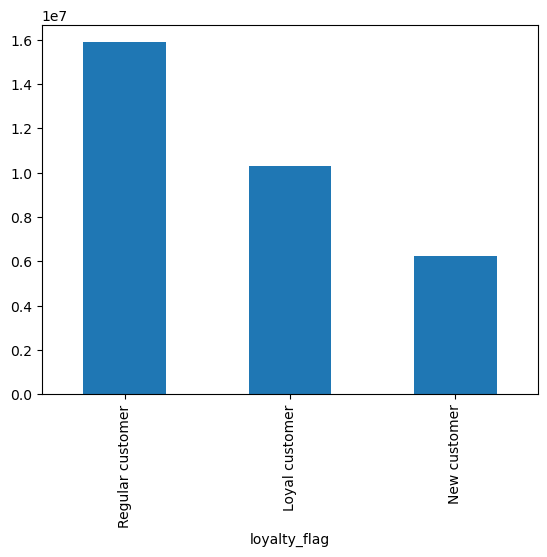

In [10]:
bar = ords_prods_cust_combined['loyalty_flag'].value_counts().plot.bar()

## 6. Check if there is a difference in expenditure depending on hour of the day

In [9]:
# Create a random sample
np.random.seed(4)

In [10]:
# Sample the data into a 70/30 split
dev = np.random.rand(len(ords_prods_cust_combined)) <= 0.7

In [11]:
# Store the 70% of the sample in the big dataframe
big = ords_prods_cust_combined[dev]

In [12]:
# Store the 30% of the sample in the small dataframe
small = ords_prods_cust_combined[~dev]

In [13]:
# Validate the total rows in the original dataset
len(ords_prods_cust_combined)

32404859

In [14]:
# Validate the number of rows in the big sample dataframe
len(big)

22683761

In [15]:
# Validate the number of rows in the small sample dataframe
len(small)

9721098

In [16]:
# Validate the total rows combined in the big and small dataframe
len(big) + len(small)

32404859

The number of rows in big and small samples combined equals the total number of rows in the original dataframe

In [17]:
# Create a new dataframe from the small sample containing only the relevant columns prices and order_hour_of_day
df_2 = small[['order_hour_of_day', 'prices']]

In [18]:
# Validate contents of new df_2 dataframe
df_2

,order_hour_of_day,prices
0,11,5.8
2,21,5.8
3,13,5.8
6,14,5.8
10,11,5.8
...,...,...
32404841,11,13.5
32404842,20,13.5
32404843,10,13.5
32404849,9,13.5


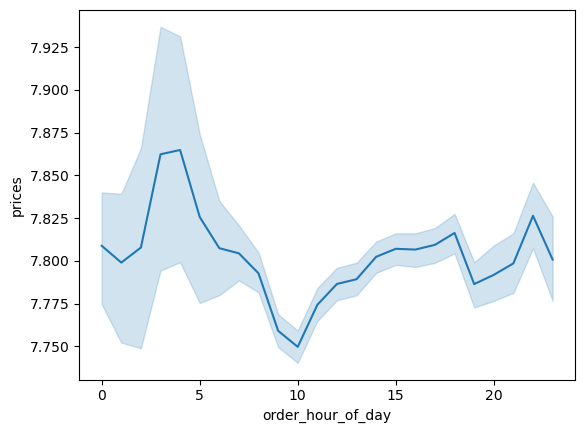

In [19]:
# Create a line chart using the df_2 dataframe
line = sns.lineplot(data = df_2, x = 'order_hour_of_day', y = 'prices')

## 7. Determine if there is a connection between aga and family situtation using a line chart

In [20]:
# Create a new dataframe df_3 containing the age and n_dependants columns from the small sample subset
df_3 = small[['age', 'n_dependants']]

In [21]:
# Validate contents of new dataframe
df_3

,age,n_dependants
0,81,1
2,66,2
3,40,3
6,20,3
10,61,1
...,...,...
32404841,59,1
32404842,39,0
32404843,53,2
32404849,66,0


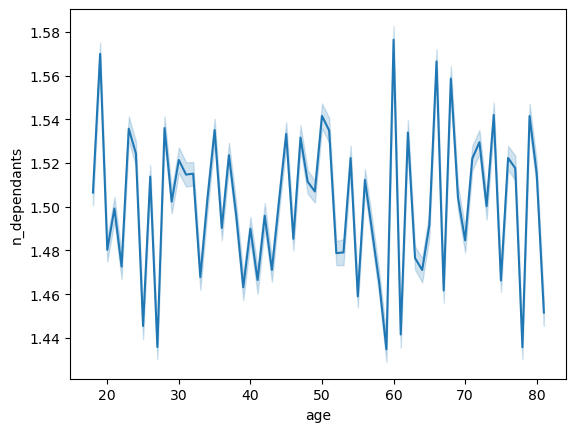

In [22]:
# Create a line chart using the df_3 dataframe
line_2 = sns.lineplot(data = df_3, x = 'age', y = 'n_dependants')

There is no clear discernable pattern bewtween age and number of dependants. One would expect the number of dependants to increase as the customer age increases, but the data in the small sample subset does not show or support this hypothesis.

## 8. Determing if there is a connection between age and spending power using a scatterplot

In [23]:
# Create a new dataframe df_4 from the small sample subset containing the age and income columns
df_4 = small[['age', 'income']]

In [24]:
# Validate contents of new df_4 dataframe
df_4

,age,income
0,81,49620
2,66,158302
3,40,31308
6,20,34171
10,61,42573
...,...,...
32404841,59,118691
32404842,39,64061
32404843,53,102296
32404849,66,106393


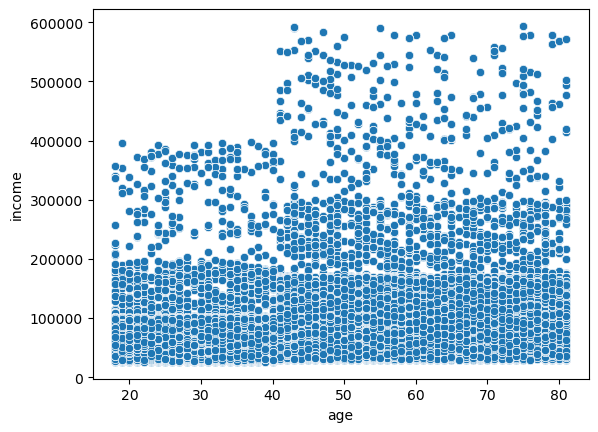

In [25]:
# Create a scatterplot using df_4 dataframe
scatterplot = sns.scatterplot(data = df_4, x = 'age', y = 'income')

The scatterplot shows all ages have a concentration of ages with incomes lower than 200,000. From age 40 and up, we can see three distinct patterns, users with income less than 200,000, users with incomes between 200,000 and 300,000, and users with incomes greater than 300,000. We can also see that there are no ages from 20 to years years of age with incomes greater than 400,000.

## 9. Export visualizations to the Analysis / Visualizations folder

In [26]:
# Export histogram as PNG file
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'histogram_order_hour_of_day.png'))

In [11]:
# Export bar chart as PNG file
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_flag.png'),bbox_inches='tight')

In [28]:
# Export line chart of expenditure by hour
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'expenditure_over_hours_of_day.png'))

In [29]:
# Export line chart of age and number of dependants
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_and_dependents.png'))

In [30]:
# Export scatterplot of age and spending power
scatterplot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_age_spending_power.png'))

In [ ]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

In [ ]:
fig=sns.barplot(data=ords_prods_cust_combined,x='loyalty_flag',y='order_id',errwidth=0)
fig.set(xlabel='Loyalty',ylabel='Orders',title="Number of orders per Loyalty status")
show_values(fig)
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'orders_per_loyalty.png'))